In [1]:
print("""
@Title        : Exploring Financial Time Series Data
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-13 22:37:00
@Description  : 
""")


@Title        : Exploring Financial Time Series Data
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-13 22:37:00
@Description  : 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Outlier detection using rolling statistics

In [3]:
df = pd.read_csv('../data/TSLA_20190101_20201231.csv', index_col='Date', parse_dates=['Date'])
df['rtn'] = df['Adj Close'].pct_change()
df = df[['rtn']].copy()

In [4]:
df_rolling = df[['rtn']].rolling(window=21).agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

# why not ?
# df_rolling = df['rtn'].rolling(window=21).agg(['mean', 'std'])

In [5]:
df = df.join(df_rolling)

In [6]:
N_SIGMAS = 3

df['upper'] = df['mean'] + N_SIGMAS * df['std']
df['lower'] = df['mean'] - N_SIGMAS * df['std']

In [7]:
df['outlier'] = ((df['rtn'] > df['upper']) | (df['rtn'] < df['lower']))

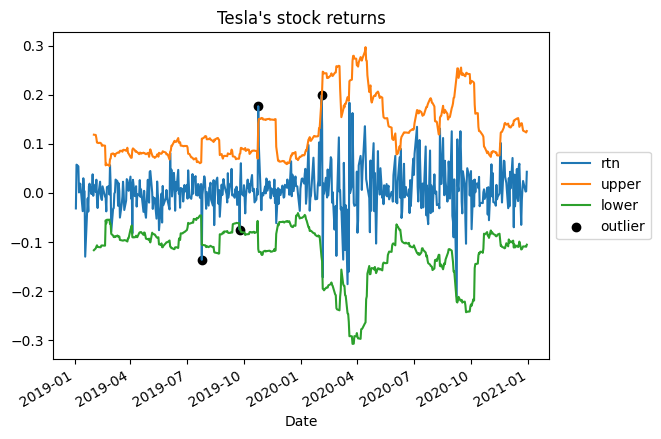

In [8]:
fig, ax = plt.subplots()
df[['rtn', 'upper', 'lower']].plot(ax=ax)
ax.scatter(df.loc[df['outlier'], 'rtn'].index,
           df.loc[df['outlier'], 'rtn'],
           color='black', label='outlier')
ax.set_title("Tesla's stock returns")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
fig.autofmt_xdate()
plt.show()

## Outlier detection with the Hampel filter

In [9]:
from sktime.transformations.series.outlier_detection import HampelFilter

In [10]:
df = pd.read_csv('../data/TSLA_20190101_20201231.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500


In [11]:
df['rtn'] = df['Adj Close'].pct_change()

In [12]:
hampel_filter = HampelFilter(window_length=10, return_bool=True)
# return_bool 默认是返回 NaN 去填充，因为 sktime 的作者认为可能需要使用 Imputer 去替换缺失值
df['outlier'] = hampel_filter.fit_transform(df['Adj Close'])

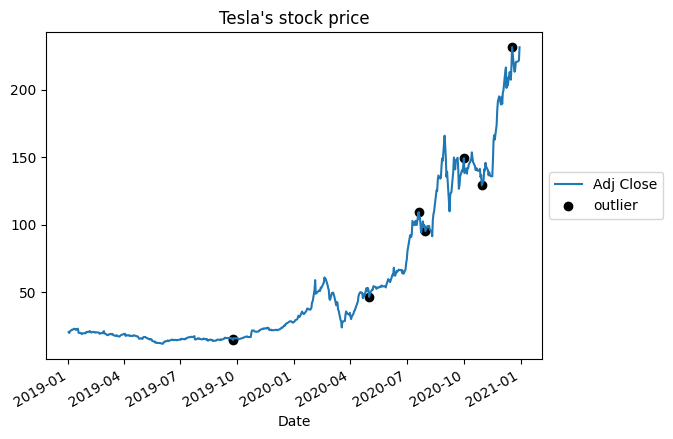

In [13]:
fig, ax = plt.subplots()
df[['Adj Close']].plot(ax=ax)
ax.scatter(df.loc[df['outlier']].index,
           df.loc[df['outlier'], 'Adj Close'],
           color='black', label='outlier')
ax.set_title("Tesla's stock price")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [14]:
df['outlier_rtn'] = hampel_filter.fit_transform(df['rtn'])

d:\anaconda3\envs\fi\lib\site-packages\sktime\transformations\series\outlier_detection.py:103: UserWarning: Series contains nan values, more nan might be
                added if there are outliers
  Z = self._transform_series(Z)


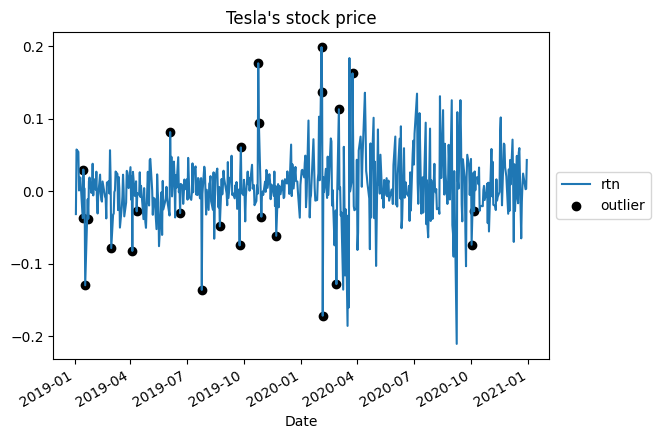

In [15]:
fig, ax = plt.subplots()
df[['rtn']].plot(ax=ax)
ax.scatter(df.loc[df['outlier_rtn']].index,
           df.loc[df['outlier_rtn'], 'rtn'],
           color='black', label='outlier')
ax.set_title("Tesla's stock price")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [16]:
df.query('outlier == True and outlier_rtn == True')

,Open,High,Low,Close,Adj Close,Volume,rtn,outlier,outlier_rtn
Date,,,,,,,,,
2019-09-24,16.101334,16.132668,14.840667,14.880667,14.880667,193372500,-0.074701,True,True


In [17]:
df.loc['2019-09', :]

,Open,High,Low,Close,Adj Close,Volume,rtn,outlier,outlier_rtn
Date,,,,,,,,,
2019-09-03,14.938667,15.263333,14.877333,15.000667,15.000667,80311500,-0.002659,False,False
2019-09-04,15.126000,15.230667,14.614000,14.712000,14.712000,86415000,-0.019244,False,False
2019-09-05,14.833333,15.320000,14.723333,15.305333,15.305333,110929500,0.040330,False,False
2019-09-06,15.146667,15.309333,15.011333,15.163333,15.163333,62841000,-0.009278,False,False
2019-09-09,15.333333,15.584000,15.282000,15.452667,15.452667,72040500,0.019081,False,False
2019-09-10,15.386667,15.702667,15.262667,15.702667,15.702667,73255500,0.016178,False,False
2019-09-11,15.825333,16.544666,15.733333,16.473333,16.473333,150642000,0.049079,False,False
2019-09-12,16.513332,16.900000,16.293333,16.391333,16.391333,128718000,-0.004978,False,False
2019-09-13,16.464001,16.563334,16.324667,16.346666,16.346666,79696500,-0.002725,False,False


## Detecting changepoints in time series

In [37]:
from kats.detectors.cusum_detection import CUSUMDetector
from kats.consts import TimeSeriesData

In [38]:
df = pd.read_csv('../data/AAPL_20200101_20231231.csv', parse_dates=['Date'], index_col='Date')
df.sample()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-08,124.370003,124.980003,123.089996,124.379997,122.221466,82225500


In [39]:
df = df[["Adj Close"]].reset_index(drop=False)
df.columns = ["time", "price"]
df.sample()

,time,price
112,2020-06-12,82.937187


In [40]:
tsd = TimeSeriesData(df)

<AxesSubplot:>

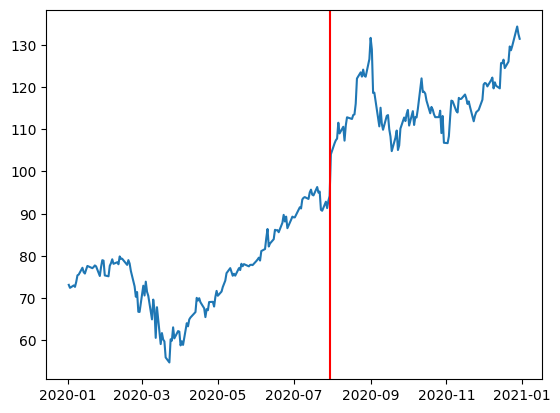

In [41]:
cusum_detector = CUSUMDetector(tsd)
change_points = cusum_detector.detector(
    change_detections=['increase']
)
cusum_detector.plot(change_points)

In [42]:
point = change_points[0]
point

CUSUMChangePoint(start_time: 2020-07-30 00:00:00, end_time: 2020-07-30 00:00:00, confidence: 1.0, direction: increase, index: 145, delta: 39.6644418454657, regression_detected: True, stable_changepoint: True, mu0: 76.56331767774608, mu1: 116.22775952321179, llr: 451.8956375666852, llr_int: inf, p_value: 0.0, p_value_int: nan)

<AxesSubplot:>

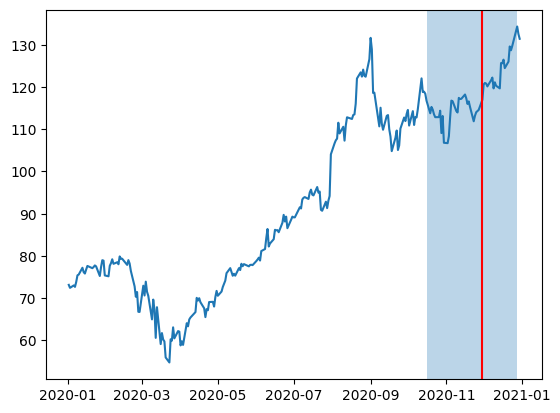

In [43]:
change_points =  cusum_detector.detector(change_points=['increase'],
                                          interest_window=[200, 250])
cusum_detector.plot(change_points)

### Using different changepoint detection algorithms

In [44]:
from kats.detectors.robust_stat_detection import RobustStatDetector

<AxesSubplot:>

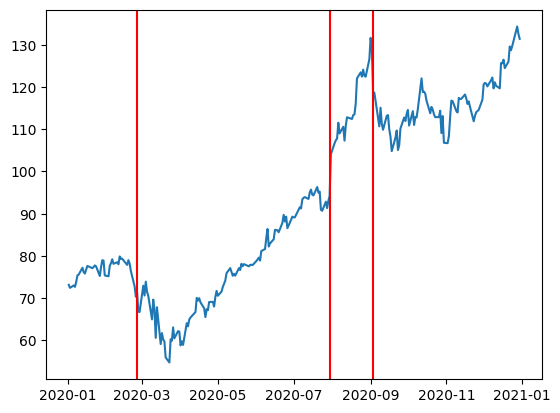

In [45]:
robust_detector = RobustStatDetector(tsd)
change_points = robust_detector.detector()
robust_detector.plot(change_points)

## Detecting trends in time series

In [58]:
df = pd.read_csv('../data/AAPL_20100101_20201231.csv', index_col='Date', parse_dates=['Date'])
df = df[["Adj Close"]].reset_index(drop=False)
df.columns = ["time", "price"]

In [59]:
tsd = TimeSeriesData(df)

In [48]:
from kats.consts import TimeSeriesData
from kats.detectors.trend_mk import MKDetector

In [60]:
trend_detector = MKDetector(tsd, threshold=.9)
time_points = trend_detector.detector(
    direction='up',
    window_size=30
)

d:\anaconda3\envs\fi\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

d:\anaconda3\envs\fi\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation



<AxesSubplot:>

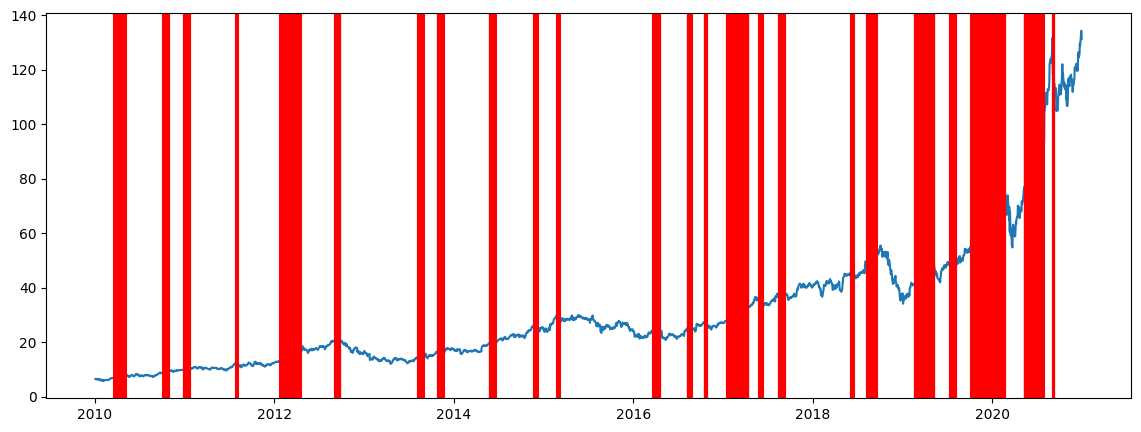

In [61]:
trend_detector.plot(time_points)

## Detecting patterns in a time series using the Hurst exponent

<AxesSubplot:title={'center':'S&P 500 (years 2000-2019)'}, xlabel='Date'>

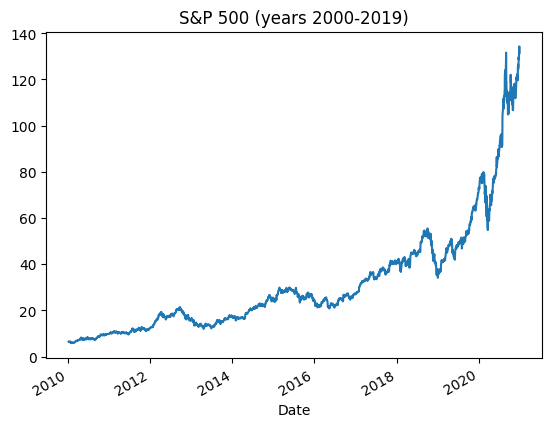

In [63]:
df = pd.read_csv('../data/AAPL_20100101_20201231.csv', index_col='Date', parse_dates=['Date'])
df['Adj Close'].plot(title='S&P 500 (years 2000-2019)')

In [76]:
from utils.detect import get_hurst_exponent

In [79]:
for lag in [20, 100, 250, 500, 1000]:
    hurst_exp = get_hurst_exponent(df['Adj Close'].values, lag)
    print(f'Hurst exponent with {lag} lags: {hurst_exp:.4f}')

Hurst exponent with 20 lags: 0.5069
Hurst exponent with 100 lags: 0.5368
Hurst exponent with 250 lags: 0.5081
Hurst exponent with 500 lags: 0.4684
Hurst exponent with 1000 lags: 0.3942


In [88]:
short_series = df.loc['2015':'2017', 'Adj Close'].values
for lag in [20, 100, 250, 500]:
    hurst_exp = get_hurst_exponent(short_series, lag)
    print(f'Hurst exponent with {lag} lags: {hurst_exp:.4f}')

Hurst exponent with 20 lags: 0.5110
Hurst exponent with 100 lags: 0.4700
Hurst exponent with 250 lags: 0.5610
Hurst exponent with 500 lags: 0.4609


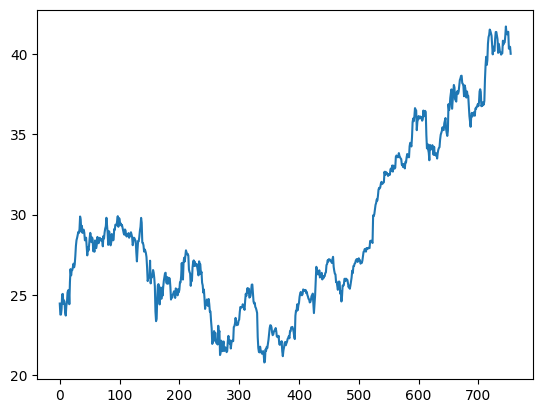

In [89]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(short_series)

## Investigating stylized facts of asset return

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs 
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('../data/AAPL_20100101_20201231.csv', parse_dates=['Date'], 
                 index_col='Date')
df = df[['Adj Close']].rename(
    columns={'Adj Close': 'adj_close'}
)
df['log_rtn'] = np.log(df['adj_close']/df['adj_close'].shift(1))
df = df.dropna()

In [10]:
r_range = np.linspace(min(df['log_rtn']),
                      max(df['log_rtn']),
                      num=1_000)
mu = df['log_rtn'].mean()
sigma = df['log_rtn'].std()
norm_pdf = scs.norm.pdf(r_range, loc=mu, scale=sigma)

d:\anaconda3\envs\fi\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


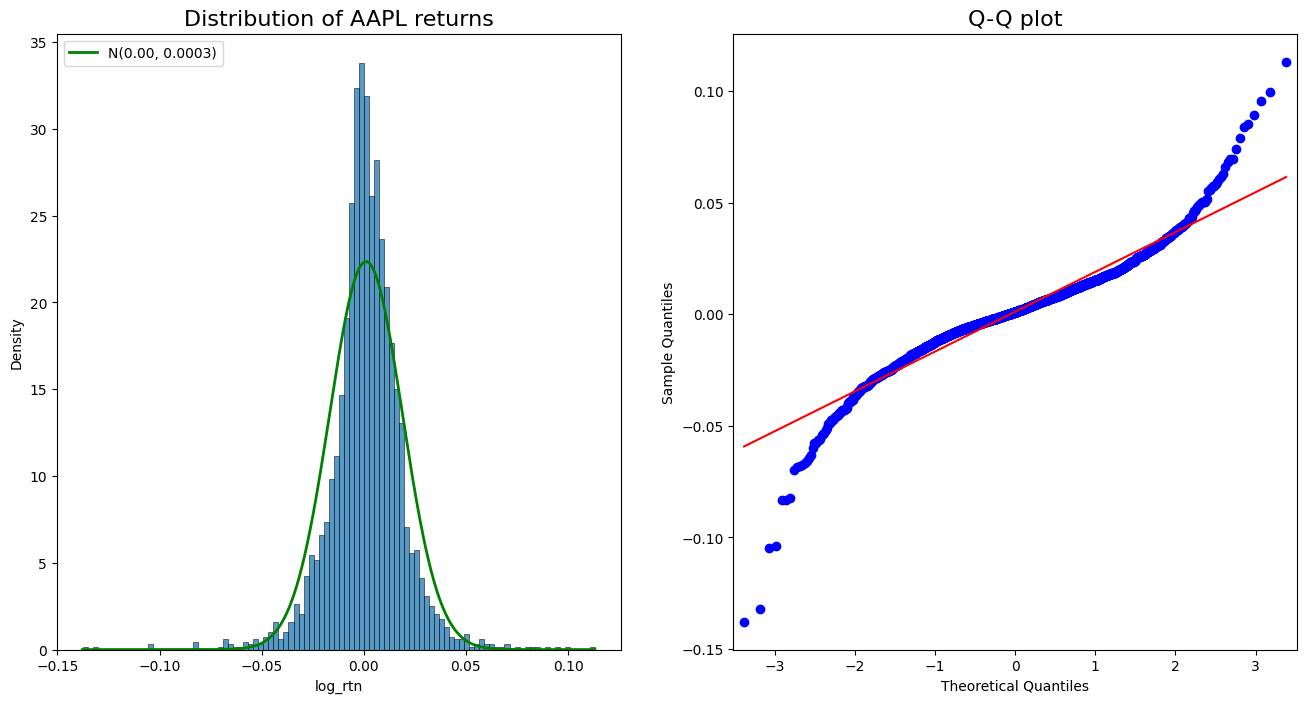

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
sns.histplot(df['log_rtn'], kde=False, ax=ax[0], stat='density')
ax[0].set_title("Distribution of AAPL returns",
                fontsize=16)
ax[0].plot(r_range, norm_pdf, "g", lw=2,
           label=f"N({mu:.2f}, {sigma**2:.4f})")
ax[0].legend(loc="upper left")

qq = sm.qqplot(df['log_rtn'].values, line='s',
               ax=ax[1])
ax[1].set_title('Q-Q plot', fontsize=16)
plt.show()

In [12]:
jb_test = scs.jarque_bera(df['log_rtn'].values)
print("---------- Descriptive Statistics ----------")
print("Range of dates:", min(df.index.date), "-", max(df.index.date))
print("Number of observations:", df.shape[0])
print(f"Mean: {df.log_rtn.mean():.4f}")
print(f"Median: {df.log_rtn.median():.4f}")
print(f"Min: {df.log_rtn.min():.4f}")
print(f"Max: {df.log_rtn.max():.4f}")
print(f"Standard Deviation: {df.log_rtn.std():.4f}")
print(f"Skewness: {df.log_rtn.skew():.4f}")
print(f"Kurtosis: {df.log_rtn.kurtosis():.4f}") 
print(f"Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}")

---------- Descriptive Statistics ----------
Range of dates: 2010-01-05 - 2020-12-30
Number of observations: 2767
Mean: 0.0011
Median: 0.0010
Min: -0.1377
Max: 0.1132
Standard Deviation: 0.0179
Skewness: -0.3225
Kurtosis: 6.4293
Jarque-Bera statistic: 4793.16 with p-value: 0.00


### Fact 2: Volatility clustering

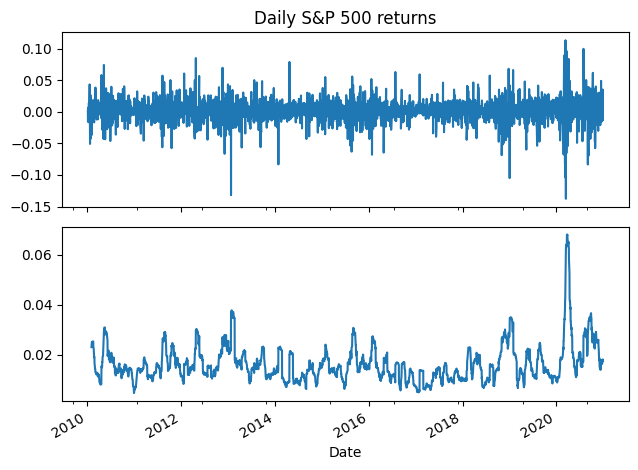

In [13]:
fig, ax = plt.subplots(2, 1, sharex=True)
df['log_rtn'].plot(title='Daily S&P 500 returns', ax=ax[0])
df['log_rtn'].rolling(window=20).std().plot(ax=ax[1])
plt.tight_layout()

In [14]:
df['log_rtn'].rolling(window=20).std()

Date
2010-01-05         NaN
2010-01-06         NaN
2010-01-07         NaN
2010-01-08         NaN
2010-01-11         NaN
                ...   
2020-12-23    0.016494
2020-12-24    0.016495
2020-12-28    0.017688
2020-12-29    0.018028
2020-12-30    0.017376
Name: log_rtn, Length: 2767, dtype: float64

### Fact 3: Absence of autocorrelation in returns

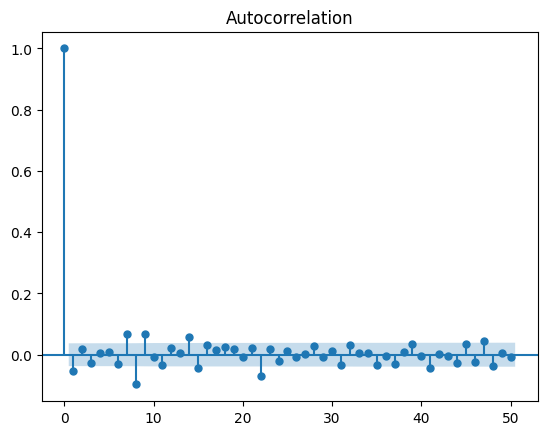

In [15]:
N_LAGS = 50
SIGNIFICANCE_LEVEl = .05
acf = smt.graphics.plot_acf(df['log_rtn'],
                            lags=N_LAGS,
                            alpha=SIGNIFICANCE_LEVEl)
plt.show()

### 事实 4：平方/绝对回报的自相关性较小且递减

[Text(0, 0.5, 'Absolute Returns'), Text(0.5, 0, 'Lag')]

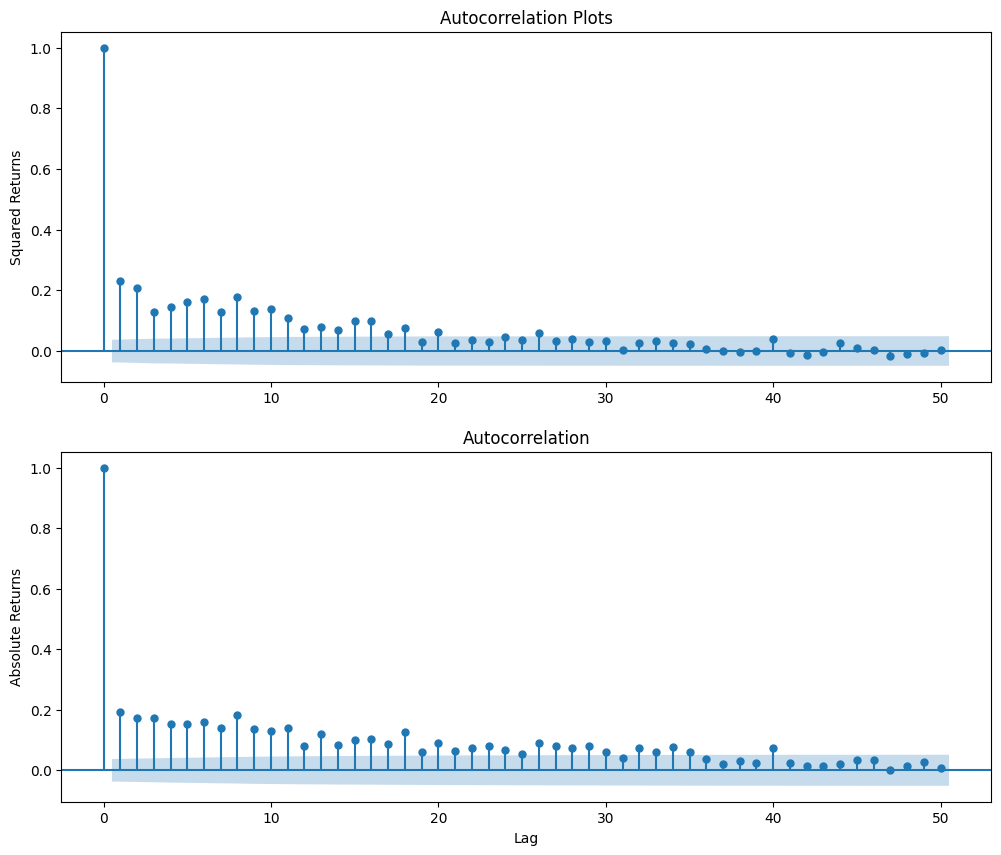

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
ax1 = smt.graphics.plot_acf(df['log_rtn'] ** 2, lags=N_LAGS,
                            alpha=SIGNIFICANCE_LEVEl, ax=ax[0])
ax[0].set(title="Autocorrelation Plots",
          ylabel="Squared Returns")
ax2 = smt.graphics.plot_acf(np.abs(df["log_rtn"]), lags=N_LAGS,
                            alpha=SIGNIFICANCE_LEVEl, ax=ax[1])
ax[1].set(ylabel="Absolute Returns",
          xlabel="Lag")

### 事实 4：杠杆影响

In [17]:
df['moving_std_252'] = df['log_rtn'].rolling(window=252).std()
df['moving_std_21'] = df['log_rtn'].rolling(window=21).std()

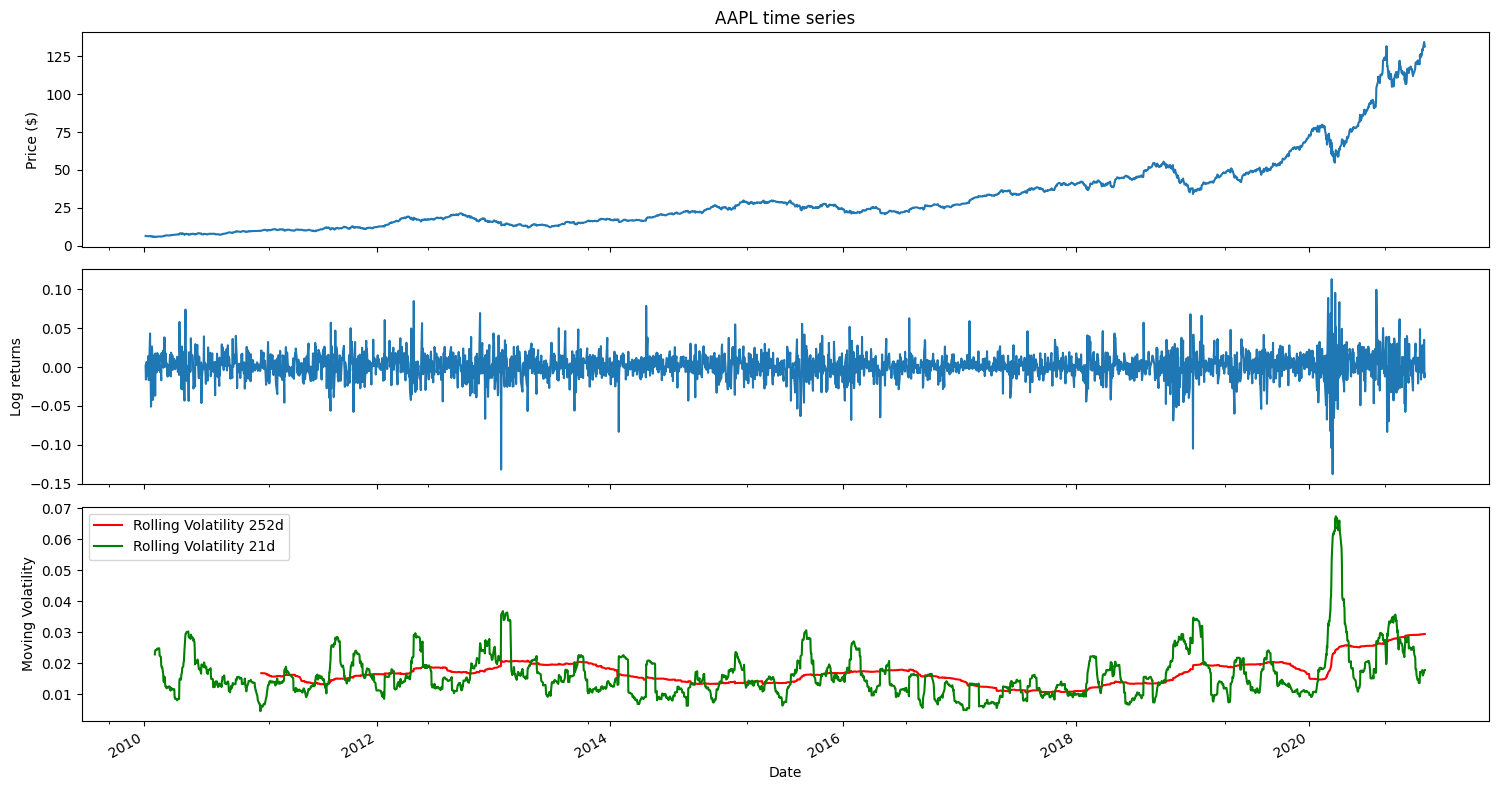

In [18]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(15, 8))
df['adj_close'].plot(ax=ax[0])
ax[0].set(title='AAPL time series', ylabel='Price ($)')
df["log_rtn"].plot(ax=ax[1])
ax[1].set(ylabel="Log returns")
df["moving_std_252"].plot(ax=ax[2], color="r",
                          label="Rolling Volatility 252d")
df["moving_std_21"].plot(ax=ax[2], color="g",
                         label="Rolling Volatility 21d")
ax[2].set(ylabel="Moving Volatility", 
          xlabel="Date")
ax[2].legend()
plt.tight_layout()
plt.show()

In [50]:
df

,adj_close,log_rtn
Date,,
2010-01-05,6.490201,0.001728
2010-01-06,6.386965,-0.016034
2010-01-07,6.375156,-0.001851
2010-01-08,6.417541,0.006626
2010-01-11,6.360930,-0.008860
...,...,...
2020-12-23,128.687241,-0.007001
2020-12-24,129.679749,0.007683
2020-12-28,134.317825,0.035141


In [52]:
df_short = df.loc['2019':'2020']

<AxesSubplot:xlabel='Date'>

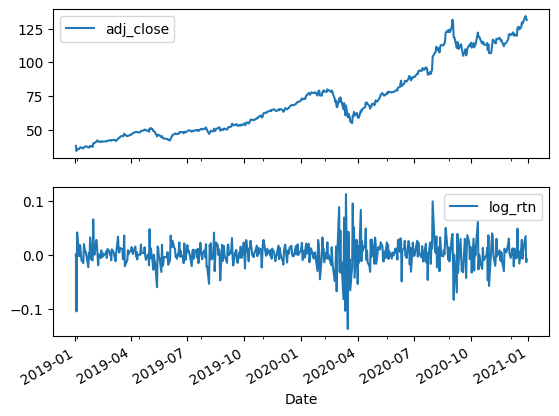

In [56]:
fig, ax = plt.subplots(2, 1, sharex=True)
df_short[['adj_close']].plot(ax=ax[0])
df_short[['log_rtn']].plot(ax=ax[1])

In [59]:
df_short[['adj_close']].rolling(window=21).corr(df['log_rtn'])

,adj_close
Date,
2019-01-02,NaN
2019-01-03,NaN
2019-01-04,NaN
2019-01-07,NaN
2019-01-08,NaN
...,...
2020-12-23,0.117862
2020-12-24,0.156949
2020-12-28,0.335510


In [71]:
volatility = np.sqrt(250) * df_short['log_rtn'].rolling(window=21).std()
cor = df_short['log_rtn'].rolling(window=21).corr(volatility)

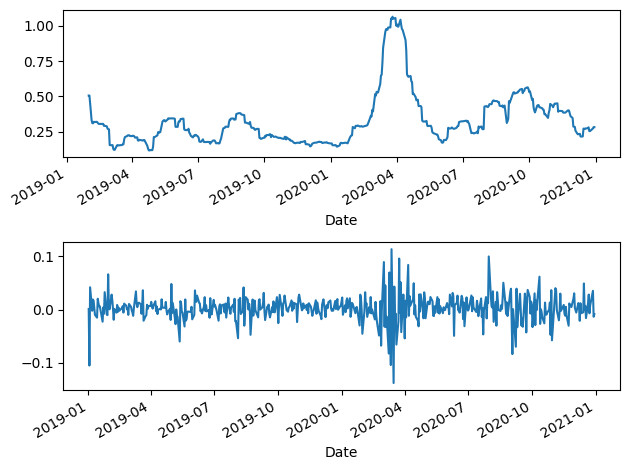

In [75]:
fig, ax = plt.subplots(2, 1)
volatility.plot(ax=ax[0])
df_short['log_rtn'].plot(ax=ax[1])
plt.tight_layout()

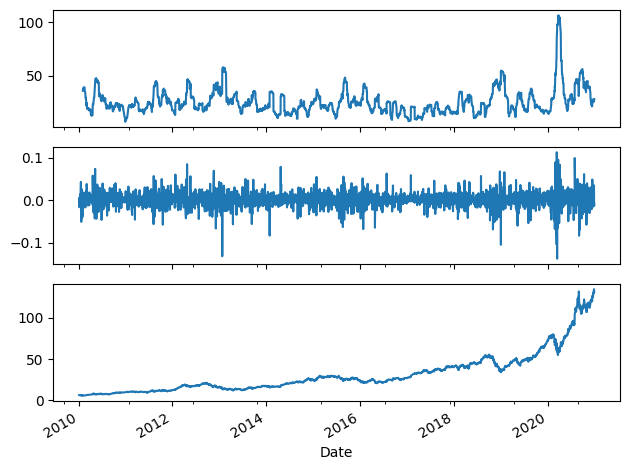

In [80]:
volatility = df['log_rtn'].rolling(window=21).std() * 100 * np.sqrt(250)
fig, ax = plt.subplots(3, 1, sharex=True)
volatility.plot(ax=ax[0])
df['log_rtn'].plot(ax=ax[1])
df['adj_close'].plot(ax=ax[2])
plt.tight_layout()

In [18]:
GSPC = pd.read_csv('../data/GSPC_20000101_20201231.csv',
                   parse_dates=['Date'],
                   index_col='Date')
VIX = pd.read_csv('../data/VIX_20000101_20201231.csv',
                  parse_dates=['Date'],
                  index_col='Date')

In [19]:
GSPC = GSPC[['Adj Close']].rename(columns={'Adj Close': 'sp500'})
VIX = VIX[['Adj Close']].rename(columns={'Adj Close': 'vix'})
df = GSPC.join(VIX)

In [23]:
df['log_rtn'] = np.log(df['sp500'] / df['sp500'].shift(1))
df['vol_rtn'] = np.log(df['vix'] / df['vix'].shift(1))
df = df.dropna(axis=0)

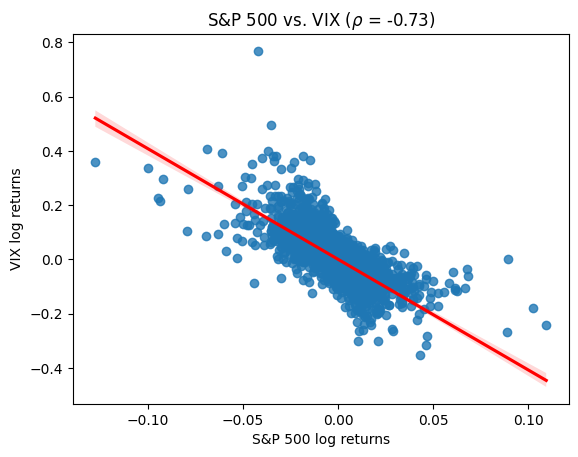

In [29]:
corr_coeff = df['log_rtn'].corr(df['vol_rtn'])
ax = sns.regplot(x='log_rtn',
                 y='vol_rtn',
                 data=df,
                 line_kws={'color': 'red'})
ax.set(title=f'S&P 500 vs. VIX ($\\rho$ = {corr_coeff:.2f})',
       ylabel='VIX log returns',
       xlabel='S&P 500 log returns')
plt.show()